<a href="https://colab.research.google.com/github/wagharalakarnita/Nita-Vagaralakar/blob/main/Decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Display all columns
pd.set_option('display.max_columns', None)
# For inline plots in Jupyter
%matplotlib inline



try:
    data = pd.read_csv("pd.read.csv")
    print("File loaded successfully.")
    # Display the first 5 rows of the dataframe
    display(data.head())
except FileNotFoundError:
    print("Error: 'Company_Data.csv' not found. Please make sure the file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())



✅ Dataset Loaded Successfully!
Shape: (400, 11)

First 5 Rows:
    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [6]:
print("\n--- Data Info ---")
print(data.info())

print("\n--- Missing Values ---")
print(data.isnull().sum())




--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None

--- Missing Values ---
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [13]:
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("\nEncoded Categorical Columns Successfully!")




Encoded Categorical Columns Successfully!


In [14]:
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

print("\nRemaining Missing Values After Cleaning:")
print(data.isnull().sum().sum())  # Should print 0





Remaining Missing Values After Cleaning:
0


In [15]:
X = data.drop('Sales_Category', axis=1)
y = data['Sales_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nData Split Done ✅")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)




Data Split Done ✅
Train Shape: (280, 10)
Test Shape: (120, 10)


In [16]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

print("\nDecision Tree Model Trained Successfully ✅")




Decision Tree Model Trained Successfully ✅


In [17]:
y_pred = dt_model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.60      0.59        55
         Low       0.66      0.65      0.65        65

    accuracy                           0.62       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.63      0.62      0.63       120


Confusion Matrix:
 [[33 22]
 [23 42]]


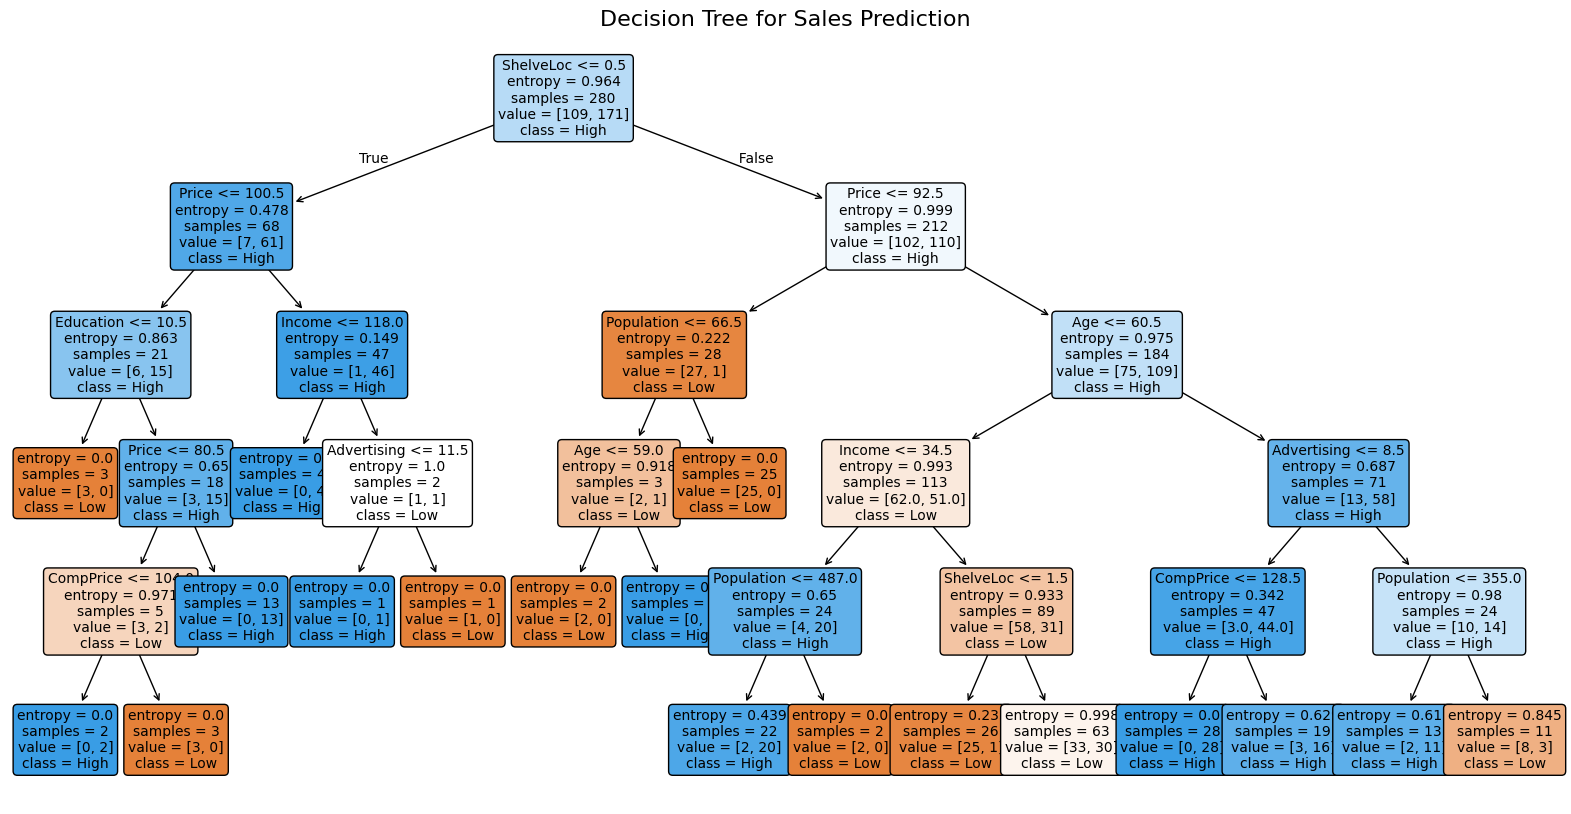

In [18]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Low', 'High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Sales Prediction", fontsize=16)
plt.show()





--- Feature Importance ---
        Feature  Importance
4        Price    0.249191
5    ShelveLoc    0.245000
6          Age    0.130886
1       Income    0.114860
3   Population    0.096075
2  Advertising    0.068821
0    CompPrice    0.055514
7    Education    0.039655
8        Urban    0.000000
9           US    0.000000


/tmp/ipython-input-3400821976.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


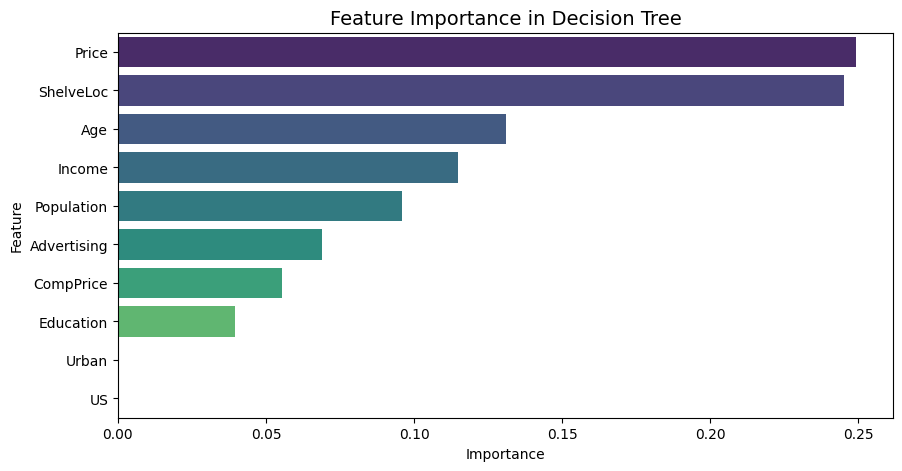

In [19]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance ---\n", feature_importance)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Decision Tree", fontsize=14)
plt.show()